# STEP 1: GET THAT DATA

In [0]:
import pandas as pd
import numpy as np
from fbprophet import Prophet 
df_train = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/covid19_0324/ca_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/covid19_0324/ca_test.csv')
df_sub = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/covid19_0324/ca_submission.csv')

# STEP 2: CLEAN THAT DATA
* For this round, we're only going to take data with confirmed cases

In [0]:
df_train = df_train[df_train['ConfirmedCases'] > 0]

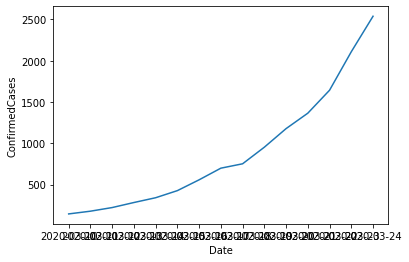

In [15]:
import seaborn as sns
sns.lineplot(df_train['Date'], df_train['ConfirmedCases'])

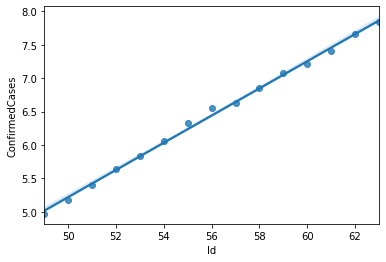

In [41]:
sns.regplot(df_train['Id'], np.log(df_train['ConfirmedCases']))

# STEP 3: MODEL THAT DATA

## 3A: `ConfirmedCases`

In [0]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()

### X = `Id`; y = `ConfirmedCases`

In [22]:
X = np.array(df_train['Id']).reshape(-1,1)
y = df_train['ConfirmedCases']
model_lr.fit(X,y)
print('R2', model_lr.score(X,y))

R2 0.8856238923259411


### X = `Id`; y = log(`ConfirmedCases`)

In [23]:
X = np.array(df_train['Id']).reshape(-1,1)
y = np.log(df_train['ConfirmedCases'])
model_lr.fit(X,y)
print('R2', model_lr.score(X,y))

R2 0.9973927213202164


## 3B: `Fatalities`

In [26]:
X = np.array(df_train['Id']).reshape(-1,1)
y = df_train['Fatalities']
model_lr.fit(X,y)
print('R2', model_lr.score(X,y))

R2 0.8583373309028113


In [25]:
X = np.array(df_train['Id']).reshape(-1,1)
y = np.log(df_train['Fatalities'])
model_lr.fit(X,y)
print('R2', model_lr.score(X,y))

R2 0.9898087710418456


## 3C: Confirmed Cases v Fatalities

In [27]:
X = np.array(df_train['ConfirmedCases']).reshape(-1,1)
y = df_train['Fatalities']
model_lr.fit(X,y)
print('R2', model_lr.score(X,y))

R2 0.9939565255603854


In [29]:
X = np.array(np.log(df_train['ConfirmedCases'])).reshape(-1,1)
y = np.log(df_train['Fatalities'])
model_lr.fit(X,y)
print('R2', model_lr.score(X,y))

R2 0.987548984456668


## STEP 4: Pick Best Models

In [33]:
cc_model = LinearRegression() # cc = Confirmed Count
X = np.array(df_train['Id']).reshape(-1,1)
y = np.log(df_train['ConfirmedCases'])
cc_model.fit(X,y)
print('R2', cc_model.score(X,y))

R2 0.9973927213202164


In [35]:
fc_model = LinearRegression() # fc = Fatality Count
X = np.array(df_train['ConfirmedCases']).reshape(-1,1)
y = df_train['Fatalities']
fc_model.fit(X,y)
print('R2', fc_model.score(X,y))

R2 0.9939565255603854


In [36]:
df_test.head()

,ForecastId,Province/State,Country/Region,Lat,Long,Date
0,1,California,US,36.1162,-119.6816,2020-03-12
1,2,California,US,36.1162,-119.6816,2020-03-13
2,3,California,US,36.1162,-119.6816,2020-03-14
3,4,California,US,36.1162,-119.6816,2020-03-15
4,5,California,US,36.1162,-119.6816,2020-03-16
